In [1]:
from torch import nn
import torch
from torch import tensor 
from torch.autograd import Variable
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
from sklearn.metrics import roc_auc_score

train= pd.read_csv('output.csv')
#df = pd.read_csv('./data/my.nih.norm.csv')
#df1 = pd.read_csv('./data/abcd_tbss01.csv')


In [2]:
data_all=train[train['GGA gap'].isnull() ==False]

In [3]:

dataset=data_all.fillna(0).reset_index(drop=True)

In [4]:
dataset

,Material,ICSD number,GGA gap,HSE gap,Atomic mass,Atomic no,Atomic orbitals_1s,Atomic orbitals_2s,Atomic orbitals_2p,Atomic orbitals_3s,...,Min oxidation state,Ionic radii hs_2,Ionic radii hs_3,Ionic radii hs_4,Ionic radii ls_2,Ionic radii ls_3,Ionic radii ls_4,Ionic radii ls_5,Ionic radii ls_6,Ionic radii ls_7
0,Ca,168757,0,0.000000,40.078000,20.0,-143.935181,-15.046905,-12.285376,-1.706331,...,0.0,0.000,0.00,0.00,0.00,0.000,0.00,0.0,0.0,0.0
1,Ni,76668,0,0.000000,58.693400,28.0,-297.870824,-35.312112,-30.868027,-3.950717,...,0.0,0.000,0.74,0.00,0.83,0.700,0.62,0.0,0.0,0.0
2,S,38263,1.975665,3.067626,32.065000,16.0,-87.789937,-7.699940,-5.751257,-0.630912,...,0.0,0.000,0.00,0.00,0.00,0.000,0.00,0.0,0.0,0.0
3,Se,86375,1.479159,2.299414,78.960000,34.0,-451.300258,-57.311948,-51.514388,-7.547186,...,0.0,0.000,0.00,0.00,0.00,0.000,0.00,0.0,0.0,0.0
4,C,193439,0,0.000000,12.010700,6.0,-9.947718,-0.500866,-0.199186,0.000000,...,0.0,0.000,0.00,0.00,0.00,0.000,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18233,Co1F1H4Na1O6S1,169111,3.202057,4.974672,58.933195,27.0,-275.616639,-32.379758,-28.152095,-3.651812,...,0.0,0.885,0.75,0.67,0.79,0.685,0.00,0.0,0.0,0.0
18234,C2H6K1N4O4P1,424131,5.238256,6.872532,12.010700,6.0,-9.947718,-0.500866,-0.199186,0.000000,...,0.0,0.000,0.00,0.00,0.00,0.000,0.00,0.0,0.0,0.0
18235,B2Be2Ca1F1K1O6,183886,5.256318,7.025251,10.811000,5.0,-6.564347,-0.344701,-0.136603,0.000000,...,0.0,0.000,0.00,0.00,0.00,0.000,0.00,0.0,0.0,0.0
18236,C8Cr1H12N2O2S2,250698,1.989884,3.025600,12.010700,6.0,-9.947718,-0.500866,-0.199186,0.000000,...,0.0,0.000,0.00,0.00,0.00,0.000,0.00,0.0,0.0,0.0


In [5]:
GGA_class=[]
for i in dataset['GGA gap'] :
    #print(i)
    if i != '0':
        print(i)
        GGA_class.append(1)
    else:
        GGA_class.append(0)

1.975665
1.479159
0.101161
3.011296
8.622969
3.35301
0.253771
7.263139
2.176846
18.025458
11.635997
2.251416
2.342096
6.985543
1.40109
12.652518
12.628631
8.617004
0.960467
1.171963
1.302616
2.456708
17.75823
2.425486
2.448508
0.350219
7.223685
1.72365
7.648339
0.510708
2.357772
6.922957
6.915962
1.466899
2.063564
2.2416
0.990355
2.348868
2.304864
2.730025
0.613106
0.601374
4.123981
0.533152
2.183681
1.429573
1.559126
1.348781
0.319598
2.223275
1.892745
5.658286
0.590555
0.277618
1.303547
0.924117
1.413891
2.02275
7.989564
2.030352
1.66379
3.755732
0.607366
0.384983
3.137296
15.365507
2.199261
3.621361
0.47798
6.754574
7.615026
0.113911
1.104804
2.391958
2.379902
1.610331
3.204417
0.8593
1.097112
9.118918
3.430363
1.193382
2.338541
3.092446
0.234227
1.958677
1.252223
0.052264
1.889388
1.838687
0.19797
0.13966
5.133896
0.073322
0.529297
4.745027
1.250968
0.627923
4.933235
1.352438
3.778109
0.59539
3.877181
0.503701
0.933836
1.468394
0.516326
0.175435
3.449466
0.471109
3.995082
0.71064
2

In [6]:
dataset['GGA gap'] = dataset

In [7]:
dataset['GGA_class']= GGA_class

In [8]:
dataset

,Material,ICSD number,GGA gap,HSE gap,Atomic mass,Atomic no,Atomic orbitals_1s,Atomic orbitals_2s,Atomic orbitals_2p,Atomic orbitals_3s,...,Ionic radii hs_2,Ionic radii hs_3,Ionic radii hs_4,Ionic radii ls_2,Ionic radii ls_3,Ionic radii ls_4,Ionic radii ls_5,Ionic radii ls_6,Ionic radii ls_7,GGA_class
0,Ca,168757,Ca,0.000000,40.078000,20.0,-143.935181,-15.046905,-12.285376,-1.706331,...,0.000,0.00,0.00,0.00,0.000,0.00,0.0,0.0,0.0,0
1,Ni,76668,Ni,0.000000,58.693400,28.0,-297.870824,-35.312112,-30.868027,-3.950717,...,0.000,0.74,0.00,0.83,0.700,0.62,0.0,0.0,0.0,0
2,S,38263,S,3.067626,32.065000,16.0,-87.789937,-7.699940,-5.751257,-0.630912,...,0.000,0.00,0.00,0.00,0.000,0.00,0.0,0.0,0.0,1
3,Se,86375,Se,2.299414,78.960000,34.0,-451.300258,-57.311948,-51.514388,-7.547186,...,0.000,0.00,0.00,0.00,0.000,0.00,0.0,0.0,0.0,1
4,C,193439,C,0.000000,12.010700,6.0,-9.947718,-0.500866,-0.199186,0.000000,...,0.000,0.00,0.00,0.00,0.000,0.00,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18233,Co1F1H4Na1O6S1,169111,Co1F1H4Na1O6S1,4.974672,58.933195,27.0,-275.616639,-32.379758,-28.152095,-3.651812,...,0.885,0.75,0.67,0.79,0.685,0.00,0.0,0.0,0.0,1
18234,C2H6K1N4O4P1,424131,C2H6K1N4O4P1,6.872532,12.010700,6.0,-9.947718,-0.500866,-0.199186,0.000000,...,0.000,0.00,0.00,0.00,0.000,0.00,0.0,0.0,0.0,1
18235,B2Be2Ca1F1K1O6,183886,B2Be2Ca1F1K1O6,7.025251,10.811000,5.0,-6.564347,-0.344701,-0.136603,0.000000,...,0.000,0.00,0.00,0.00,0.000,0.00,0.0,0.0,0.0,1
18236,C8Cr1H12N2O2S2,250698,C8Cr1H12N2O2S2,3.025600,12.010700,6.0,-9.947718,-0.500866,-0.199186,0.000000,...,0.000,0.00,0.00,0.00,0.000,0.00,0.0,0.0,0.0,1


In [9]:



if "Set" not in dataset.columns:
    dataset["Set"] = np.random.choice(["train", "valid", "test"], p =[.8, .1, .1], size=(dataset.shape[0],))

train_indices = dataset[dataset.Set=="train"].index
valid_indices = dataset[dataset.Set=="valid"].index
test_indices = dataset[dataset.Set=="test"].index

In [10]:
target = 'GGA_class'
unused_feat = ['Material', 'Set', 'GGA gap', 'HSE gap']
features = [ col for col in train.columns if col not in unused_feat + [target]] 

In [11]:
X_train = dataset[features].values[train_indices]
y_train = dataset[target].values[train_indices]
X_valid = dataset[features].values[valid_indices]
y_valid = dataset[target].values[valid_indices]
X_test = dataset[features].values[test_indices]
y_test = dataset[target].values[test_indices]

print("X_train.shape: ", X_train.shape)
print("y_train.shape: ",y_train.shape)
print("X_valid.shape: ", X_valid.shape)
print("y_valid.shape: ",y_valid.shape)
print("X_test.shape: ", X_test.shape)
print("y_test.shape: ",y_test.shape)

X_train.shape:  (14585, 114)
y_train.shape:  (14585,)
X_valid.shape:  (1853, 114)
y_valid.shape:  (1853,)
X_test.shape:  (1800, 114)
y_test.shape:  (1800,)


clf = TabNetClassifier()
clf.fit(X_train, y_train, X_valid, y_valid, patience=5, batch_size=256, max_epochs=200)
preds_acc = clf.predict(X_test)
preds_prob = clf.predict_proba(X_test)
test_auc = roc_auc_score(y_score=preds_prob[:,0], y_true=y_test)

In [ ]:
# Augmented
import torch
import itertools
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from tqdm.notebook import tqdm
# Store maximum auc
max_auc = 0
# Store maximum hypterparameter set
max_hy = []
# define hyperparameter space
n_ = [4,8,16]
lr_ = [2e-2, 1e-2, 2e-3]
w_ = [0.01, 0.001]
g_ = [0.95, 0.99, 0.9]
ss_ = [10, 20, 30]
all_ = [n_, lr_, w_, g_, ss_]
h_space = [s for s in itertools.product(*all_)]
# Start training


for hy in tqdm(h_space):
    clf = TabNetClassifier(n_a = hy[0],
                           n_d = hy[0],
                           optimizer_params = dict(lr=hy[1], weight_decay=hy[2]),
                           scheduler_params={"step_size":hy[4], "gamma":hy[3]},
                           scheduler_fn=torch.optim.lr_scheduler.StepLR,
                           verbose=0
                           )
    clf.fit(X_train, y_train, X_valid, y_valid, patience=50, batch_size=256, max_epochs=200)
    preds_acc = clf.predict(X_test)
    preds_prob = clf.predict_proba(X_test)
    test_auc = roc_auc_score(y_score=preds_prob[:,1], y_true=y_test)
    test_acc = accuracy_score(preds_acc, y_test)
    
    print("FINAL TEST SCORE", test_auc, test_acc)
    if test_auc>max_auc:
        max_hy = hy
        max_auc = test_auc


In [13]:
import torch
import itertools
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from tqdm.notebook import tqdm
hy = (4, 0.02, 0.01, 0.99, 10)
clf = TabNetClassifier(n_a = hy[0],
                           n_d = hy[0],
                           optimizer_params = dict(lr=hy[1], weight_decay=hy[2]),
                           scheduler_params={"step_size":hy[4], "gamma":hy[3]},
                           scheduler_fn=torch.optim.lr_scheduler.StepLR,
                           verbose=0
                           )
clf.fit(X_train, y_train, X_valid, y_valid, patience=50, batch_size=256, max_epochs=200)
preds_acc = clf.predict(X_test)
preds_prob = clf.predict_proba(X_test)
test_auc = roc_auc_score(y_score=preds_prob[:,1], y_true=y_test)
test_acc = accuracy_score(preds_acc, y_test)
print("max_hy = " ,hy)
print("FINAL TEST SCORE", test_auc, test_acc)
print("Valid score: {}".format(-clf.best_cost))


Device used : cuda
max_hy =  (4, 0.02, 0.01, 0.99, 10)
FINAL TEST SCORE 0.7692985180277083 0.71
Valid score: 0.7674432930009137


Text(0, 0.5, 'Loss')

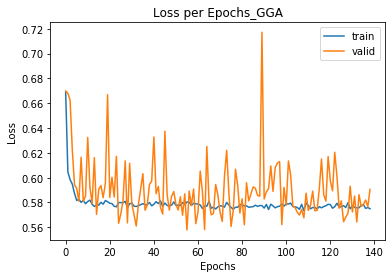

In [22]:

plt.plot(clf.history['train']['loss'], label='train')
plt.plot(clf.history['valid']['loss'], label='valid')
plt.legend()

plt.title('Loss per Epochs_GGA')
plt.xlabel('Epochs')
plt.ylabel('Loss')



KeyError: 'lr'

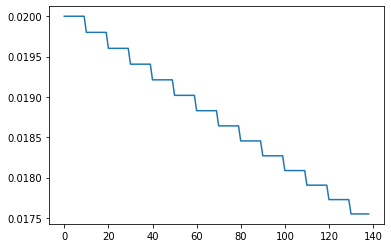

In [17]:
plt.plot(clf.history['train']['lr'])
plt.plot(clf.history['valid']['lr'])

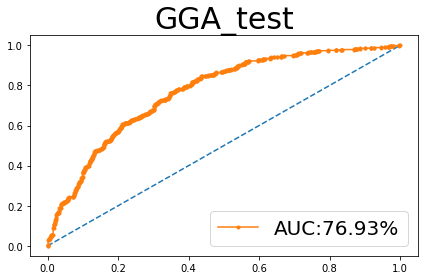

In [18]:
def rocvis(true , prob , label ) :
    from sklearn.metrics import roc_curve
    if type(true[0]) == str :
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        true = le.fit_transform(true)
    else :
        pass
    fpr, tpr, thresholds = roc_curve(true, prob)
    plt.plot(fpr, tpr, marker='.', label = label  )

target_name = 'GGA'
plt.plot([0, 1], [0, 1], linestyle='--')
rocvis(y_test , preds_prob[:,1] , f"AUC:{round(test_auc*100, 2)}%")

plt.legend(fontsize = 20)
plt.title(f'{target_name}_test', fontsize= 30)
plt.tight_layout()
plt.savefig(f'{target_name}_ROC.png')
plt.show()        


Do it with best hyperparameter 

find feature importance 